In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pandas as pd
import glob
from copy import deepcopy
from scipy.stats import *
from sklearn import linear_model

from area_mean import *
from binned_cyFunctions5 import *
from read_hs_file import read_var_mod
from read_var_obs import *
from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *
from useful_func_cy import *

In [32]:
# Sertting:
pth_plotting = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'
pth_data = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/data_file/'

In [50]:
exp = 'piControl'
# Model list (Global Climate Model);

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

deck = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
             FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
              GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48] # 50


Create Data set:

In [51]:
def get_P_E_CMIP(deck):
    
    # loop through the GCM deck:
    
    inputVar_gcm_abr = {}
    inputVar_gcm_pi = {}
    
    for i in range(len(deck)):
        
        if deck[i]['cmip'] == 'cmip5':
            
            #..abrupt4xCO2
            deck[i]['exper'] = 'abrupt4xCO2'

            TEST1_time= read_var_mod(varnm='pr', read_p =False, time1=[1,1,1], time2=[3349, 12, 31], **deck[i])[-1]
            time1=[int(min(TEST1_time[:,0])),1,1]
            time2=[int(min(TEST1_time[:,0]))+149, 12, 31]

            print("retrieve time: ", time1, time2)
            
            #.. read 'abrupt4xCO2' P and E:
            P_abr  = read_var_mod(varnm='pr', read_p=False, time1= time1, time2= time2, **deck[i])[0]
            E_abr,[],lat_abr_cmip5,lon_abr_cmip5,times_abr_cmip5 = read_var_mod(varnm='hfls', read_p=False, time1= time1, time2= time2, **deck[i])
            sfc_T_abr  = read_var_mod(varnm='ts', read_p=False, time1= time1, time2= time2, **deck[i])[0]
            
            inputVar_abr_cmip5 = {'P': P_abr, 'E': E_abr, 'sfc_T': sfc_T_abr, 'lat': lat_abr_cmip5, 'lon': lon_abr_cmip5, 'times': times_abr_cmip5}
            
            inputVar_gcm_abr[deck[i]['modn']] = inputVar_abr_cmip5
            
            #..piControl:
            deck[i]['exper'] = 'piControl'

            if deck[i]['modn'] == 'IPSL-CM5A-LR':
                deck[i]['ensmem'] = 'r1i1p1'
                TEST2_time= read_var_mod(varnm='hfls', read_p= False, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])), 1, 1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            else:

                TEST2_time= read_var_mod(varnm='ps', read_p= False, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])),1,1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            print ("retrieve time: ", timep1, timep2)
            
            #.. read 'piControl' P and E data:
            
            P_pi  = read_var_mod(varnm='pr', read_p=False, time1= timep1, time2= timep2, **deck[i])[0]
            #..Precipitation, Units in kg m^-2 s^-1 = mm * s^-1
            E_pi, [],lat_pi_cmip5,lon_pi_cmip5,times_pi_cmip5 = read_var_mod(varnm='hfls', read_p=False, time1= timep1, time2= timep2, **deck[i])
            #..Evaporations, Units in W m^-2 = J * m^-2 * s^-1
            sfc_T_pi = read_var_mod(varnm='ts', read_p=False, time1= timep1, time2= timep2, **deck[i])[0]
            
            inputVar_pi_cmip5 = {'P': P_pi, 'E': E_pi, 'sfc_T': sfc_T_pi, 'lat':lat_pi_cmip5, 'lon':lon_pi_cmip5, 'times': times_pi_cmip5}
            inputVar_gcm_pi[deck[i]['modn']] = inputVar_pi_cmip5
        
        elif deck[i]['cmip'] == 'cmip6':
            
            #..abrupt4xCO2:
            deck[i]['exper'] = 'abrupt-4xCO2'

            if deck[i]['modn'] == 'HadGEM3-GC31-LL':
                deck[i]['ensmem'] = 'r1i1p1f3'

                TEST1_time= read_var_mod(varnm='pr', read_p =False, time1=[1,1,15], time2=[3349, 12, 15], **deck[i])[-1]
                time1=[int(min(TEST1_time[:,0])),1,15]
                time2=[int(min(TEST1_time[:,0]))+149, 12, 15]

            elif deck[i]['modn'] == 'EC-Earth3':
                deck[i]['ensmem'] = 'r3i1p1f1'

                TEST1_time= read_var_mod(varnm='pr', read_p =False, time1=[1,1,1], time2=[3349, 12, 31], **deck[i])[-1]
                time1=[int(min(TEST1_time[:,0])),1,1]
                time2=[int(min(TEST1_time[:,0]))+149, 12, 31]

            else:

                TEST1_time= read_var_mod(varnm='pr', read_p =False, time1=[1,1,1],time2=[3349, 12, 31], **deck[i])[-1]
                time1=[int(min(TEST1_time[:,0])),1,1]
                time2=[int(min(TEST1_time[:,0]))+149, 12, 31]

            print("retrieve time: ", time1, time2)
            
            #.. read 'abrupt-4xCO2' P and E: 
            P_abr  = read_var_mod(varnm='pr', read_p=False, time1= time1, time2= time2, **deck[i])[0]
            E_abr, [],lat_abr_cmip6,lon_abr_cmip6,times_abr_cmip6 = read_var_mod(varnm='hfls', read_p=False, time1= time1, time2= time2, **deck[i])
            sfc_T_abr  = read_var_mod(varnm='ts', read_p=False, time1= time1, time2= time2, **deck[i])[0]
            inputVar_abr_cmip6 = {'P': P_abr, 'E': E_abr, 'sfc_T': sfc_T_abr, 'lat': lat_abr_cmip6, 'lon': lon_abr_cmip6, 'times': times_abr_cmip6}
            
            inputVar_gcm_abr[deck[i]['modn']] = inputVar_abr_cmip6
            
            #..piControl:
            deck[i]['exper'] = 'piControl'

            if deck[i]['modn'] == 'HadGEM3-GC31-LL':
                deck[i]['ensmem'] = 'r1i1p1f1'
                TEST2_time= read_var_mod(varnm='ps', read_p =False, time1=[1,1,15], time2=[8000,12,15], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])), 1,15]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 15]  #.. max-750

            elif deck[i]['modn'] == 'EC-Earth3':
                deck[i]['ensmem'] = 'r1i1p1f1'
                TEST2_time= read_var_mod(varnm='ps', read_p =False, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])), 1, 1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            elif deck[i]['modn'] == 'NESM3':
                deck[i]['ensmem'] = 'r1i1p1f1'
                TEST2_time= read_var_mod(varnm ='ta', read_p= True, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])), 1, 1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            elif deck[i]['modn'] == 'CNRM-CM6-1':
                deck[i]['ensmem'] = 'r1i1p1f2'
                TEST2_time= read_var_mod(varnm='hfls', read_p =False, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])), 1, 1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            else:
                TEST2_time= read_var_mod(varnm='ps', read_p =False, time1=[1,1,1], time2=[8000,12,31], **deck[i])[-1]
                timep1=[int(min(TEST2_time[:,0])),1,1]   #.. max-799
                timep2=[int(min(TEST2_time[:,0]))+98, 12, 31]  #.. max-750

            print ("retrieve time: ", timep1, timep2)
            
            #.. read 'piControl' P and E data: 
            
            P_pi  = read_var_mod(varnm='pr', read_p=False, time1= timep1, time2= timep2, **deck[i])[0]
            #..Precipitation, Units in kg m^-2 s^-1 = mm * s^-1
            E_pi, [],lat_pi_cmip6,lon_pi_cmip6,times_pi_cmip6 = read_var_mod(varnm='hfls', read_p=False, time1= timep1, time2= timep2, **deck[i])
            #..Evaporations, Units in W m^-2 = J * m^-2 * s^-1
            sfc_T_pi  = read_var_mod(varnm='ts', read_p=False, time1= timep1, time2= timep2, **deck[i])[0]
            inputVar_pi_cmip6 = {'P': P_pi, 'E': E_pi, 'sfc_T': sfc_T_pi, 'lat': lat_pi_cmip6, 'lon': lon_pi_cmip6, 'times': times_pi_cmip6}
            
            inputVar_gcm_pi[deck[i]['modn']] = inputVar_pi_cmip6
        
        
    return inputVar_gcm_abr, inputVar_gcm_pi

In [52]:
def get_P_E_OBS(test_flag = 'test1'):
    # This function is for reading the P - E Observation data from the MERRA-2 Re-analysis.
    
    P = read_var_obs_MERRA2(varnm = 'PRECTOT', read_p = False, valid_range1=[2002, 7, 15], valid_range2=[2016, 12, 31])[0]
    E, lat_merra2, lon_merra2, [], times_merra2  = read_var_obs_MERRA2(varnm = 'EFLUX', read_p = False, valid_range1=[2002, 7, 15], valid_range2=[2016, 12, 31])
    sfc_T = read_var_obs_MERRA2(varnm = 'TS', read_p = False, valid_range1=[2002, 7, 15], valid_range2=[2016, 12, 31])[0]
    
    inputVar_obs = {'P': P, 'E': E, 'sfc_T': sfc_T, 'lat': lat_merra2, 'lon': lon_merra2, 'times': times_merra2}   # 'clivi': clivi_abr, 'clwvi':clwvi_abr, 'rsdt': rsdt_abr, 'rsut': rsut_abr, 'rsutcs': rsutcs_abr..
    
    return inputVar_obs

In [53]:
def PL_P_E_lat(data_gcm_pi, data_gcm_DELTA, data_OBS, deck, pth_plotting):
    # This function is for plotting (1)the 'P - E' vs latitude plot, (2)the 'delta_P-E' vs latitude plot.
    # 'data_gcm_pi' is a dict who save the 'piControl' Moisture Convergence data,
    # 'data_gcm_DELTA' save the DELTA_Moisture Convergence | (abrupt4xCO2 - mean(piControl)) data,
    # 'data_obs' save the MERRA-2 Moisture Convergence data;
    # deck is a list for GCM info,
    # pth_plotting provides the plots saving path.
    
    fig6 = plt.figure(figsize=(9.5, 6.5))  #(16.2, 9.3))
    ax6 = fig6.add_axes([0,0,0.7,1])
    parameters = {'axes.labelsize': 16, 'legend.fontsize': 17, 'axes.titlesize': 14, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
    plt.rcParams.update(parameters)
    
    # plotting:
    for i in range(len(deck)):
        # 'piControl' P - E:
        ax6.plot(data_gcm_pi[deck[i]['modn']]['lat'], np.nanmean(data_gcm_pi[deck[i]['modn']]['MC'], axis = (0,2)), color = 'gray', alpha = 0.50, linewidth = 2., label = "mean state P - E ", zorder = 10)
    
    ax52 = ax6.twinx()
    color = 'tab:red'
    # Create a color palette
    palette = plt.get_cmap('bwr')
    ax52.set_ylabel(r"$ \Delta (P\ -\ E)\ [mm\ day^{-1}]$", color=color)  # we already handled the x-label with ax1
    ax52.tick_params(axis='y', labelcolor=color)
    
    # calc the SO mean delta_Moiusture Convergence, use this value for palette:
    
    relative_P_E = []
    for j in range(len(deck)):
        data_gcm_DELTA_SO, lat_gcm_so, lon_gcm_so = region_cropping_var(data_gcm_DELTA[deck[j]['modn']+'MC'], data_gcm_DELTA[deck[j]['modn']+'lat'], data_gcm_DELTA[deck[j]['modn']+'lon'], lat_range = [-85., -40.], lon_range = [-180., 180.])
        
        relative_P_E.append(np.nanmean(area_mean(data_gcm_DELTA_SO[12*140:12*150, :,:], lat_gcm_so, lon_gcm_so)))
    
    # Normalized array between 0, 1: (# = 44)
    nor_SO_P_E = (np.asarray(relative_P_E) - np.min(relative_P_E)) / (np.max(relative_P_E) - np.min(relative_P_E))
    
    for j in range(len(deck)):
        ax52.plot(data_gcm_DELTA[deck[j]['modn']+'lat'], np.nanmean(data_gcm_DELTA[deck[j]['modn']+'MC'][12*140:12*150, :, :], axis = (0, 2)), color = palette(nor_SO_P_E[j]), linewidth = 2.0, alpha = 0.40, linestyle = '-', label = r"$\ Delta P\ -\ E $", zorder = 50)
    
    ax6.plot(data_OBS['lat'], np.nanmean(data_OBS['MC'], axis = (0, 2)), color = 'purple', linewidth = 2.8, alpha = 1.0, linestyle = '-', label = ' MERRA-2 Observation ', zorder = 60)
    
    plt.axhline(0., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
    plt.axvline(-85., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
    plt.axvline(-40., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
    # plotting setting:
    ax6.set_xlim([90., -90.])
    
    ax6.set_ylim([-4.5, 4.5])
    ax52.set_ylim([-3.2, 3.2])
    ax6.set_ylabel(r"$ P\ -\ E,\ [mm/day^{1}] $")
    ax6.set_xlabel(r"$ Lat $")
    # plt.legend()
    plt.title(" Precipitation - Evaporation ")
    
    plt.show()
    # plt.savefig(pth_plotting+"Fig_S1(a).jpg", bbox_inches = 'tight', dpi = 400)
    
    return None


In [54]:
def P_E_analysis():
    
    exp = 'piControl'
    # Model list (Global Climate Model);

    # CMIP6: 31 (30: BCCCSMCM2MR)
    AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
                   'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
                   'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

    CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                   'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
    CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
                   'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
    CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                     'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
    CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
                   'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

    ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
    ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

    FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                    'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                    'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                    'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                   'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
    # HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
    #             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
    INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                    'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
    IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                      'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
    MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
    MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                      'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                    'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                     'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                     'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
    TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                     'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

    # CMIP5: 20 (18, ACCESS10, ACCESS13)
    ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
              'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

    CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
                 'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
                   'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

    MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
                'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
    GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

    deck = [CanESM5, E3SM10, CESM2FV2, CESM2, CNRMCM61, CESM2WACCMFV2, CNRMESM21, NESM3, IPSLCM6ALR, CESM2WACCM, MIROCESM, TaiESM1, ECEarth3Veg, CNRMCM61HR, ECEarth3, 
             FGOALSs2, IPSLCM5ALR, CSIRO_Mk360, BNUESM, GFDLCM3, GFDLCM4, SAM0, CanESM2, MPIESMLR, CMCCCM2SR5, MPIESMMR, FGOALSg2, BCCESM1, CNRMCM5, AWICM11MR, MRIESM20, 
              GISSE21H, MPIESM12LR, CCSM4, NorESM1M, FGOALSg3, bcccsm11, MIROC5, GISSE21G, MIROCES2L, MRICGCM3, MIROC6, NorESM2MM, GFDLESM2M, GFDLESM2G, GISSE22G, GISSE21H, CAMSCSM1, GISSE2R, INM_CM48]  # 50 models 
    
    # deck = [ MIROCESM, MPIESMLR, bcccsm11, MRICGCM3, GFDLESM2M, GFDLESM2G]  # the remaining 6 models
    
    inputVar_p_e_abr, inputVar_p_e_pi = get_P_E_CMIP(deck)
    inputVar_p_e_obs = get_P_E_OBS()


    # calculate 'P - E':
    # GCM(s) data
    for m in range(len(deck)):
        # 'abrupt4xCO2'
        Precip_abr = np.asarray(inputVar_p_e_abr[deck[m]['modn']]['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
        
        lh_vaporization_abr = (2.501 - (2.361 * 10**-3) * (inputVar_p_e_abr[deck[m]['modn']]['sfc_T'] - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
        # Eva_abr2 = array(inputVar_p_e_abr[deck[m]['modn']]['E']) * (24. * 60 * 60)
        Eva_abr1 = array(inputVar_p_e_abr[deck[m]['modn']]['E']) / lh_vaporization_abr * (24. * 60 * 60)  #.. Evaporation, mm day^-1
        
        MC_abr = Precip_abr - Eva_abr1   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1
        
        inputVar_p_e_abr[deck[m]['modn']]['MC'] =  MC_abr
        
        # 'piControl'
        Precip_pi = array(inputVar_p_e_pi[deck[m]['modn']]['P']) * (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
        
        lh_vaporization_pi = (2.501 - (2.361 * 10**-3) * (inputVar_p_e_pi[deck[m]['modn']]['sfc_T'] - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
        Eva_pi1 = array(inputVar_p_e_pi[deck[m]['modn']]['E']) / lh_vaporization_pi * (24. * 60 * 60)
        # Eva_pi2 = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1
        
        MC_pi = Precip_pi - Eva_pi1   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1
        
        inputVar_p_e_pi[deck[m]['modn']]['MC'] = MC_pi
    
    # OBS: MERRA-2 Re-analysis data
    SST_obs = inputVar_p_e_obs['sfc_T'] * 1.
    # Precip: Precipitation, Unit in mm day^-1 (convert from kg m^-2 s^-1)
    Precip_obs = inputVar_p_e_obs['P'] * (24. * 60 * 60)
    # Eva: Evaporation, Unit in mm day^-1 (here use the latent heat flux from the sfc, unit convert from W m^-2 --> kg m^-2 s^-1 --> mm day^-1)
    lh_vaporization_obs = (2.501 - (2.361 * 10**-3) * (SST_obs - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
    Eva_obs = inputVar_p_e_obs['E'] / lh_vaporization_obs * (24. * 60 * 60)

    # MC: Moisture Convergence, represent the water vapor abundance, Unit in mm day^-1
    MC_obs = Precip_obs - Eva_obs
    
    inputVar_p_e_obs['MC'] = MC_obs
    
    # calc the 'abr - mean(pi)' value of 'P - E':
    inputVar_p_e_abrminuspi = {}
    for h in range(len(deck)):
        inputVar_p_e_abrminuspi[deck[h]['modn']+'MC'] = inputVar_p_e_abr[deck[h]['modn']]['MC'] - np.nanmean(inputVar_p_e_pi[deck[h]['modn']]['MC'], axis = 0)  # return be 3-D shape array: (length_time_abrupt4xCO2, lat, lon)
        inputVar_p_e_abrminuspi[deck[h]['modn']+'lat'] = inputVar_p_e_abr[deck[h]['modn']]['lat']
        inputVar_p_e_abrminuspi[deck[h]['modn']+'lon'] = inputVar_p_e_abr[deck[h]['modn']]['lon']
    
    
    # do annually mean on the OBS data:
    # annually mean variable
    inputVar2_OBS_yr = get_annually_dict(inputVar_p_e_obs, ['MC'], inputVar_p_e_obs['times'], label = 'mon')
    
    # Plotting function:
    pth_plotting = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'
    PL_P_E_lat(inputVar_p_e_pi, inputVar_p_e_abrminuspi, inputVar2_OBS_yr, deck, pth_plotting)
    
    # Save the calculated P - E metrics:
    pth_data = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/data_file/'
    # np.savez(pth_data+'_P_E_data(global)', GCM_p_e_abr = inputVar_p_e_abr, GCM_p_e_pi = inputVar_p_e_pi, GCM_p_e_abrminuspi = inputVar_p_e_abrminuspi, OBS_p_e = inputVar_p_e_obs, OBS_p_e_annually_mean = inputVar2_OBS_yr)
    np.savez(pth_data+'6GCMs_P_E_data(global)', GCM_p_e_pi = inputVar_p_e_pi, GCM_p_e_abrminuspi = inputVar_p_e_abrminuspi, OBS_p_e = inputVar_p_e_obs)
    
    return None
    

### do the calculation and save file for the 6 models:

MIROC-ESM
1
/glade/scratch/chuyan/CMIP5data/
['/glade/scratch/chuyan/CMIP5data/pr_Amon_MIROC-ESM_abrupt4xCO2_r1i1p1_000101-015012.nc']
 Variable pr   abrupt4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 64, 128)
retrieve time:  [1, 1, 1] [150, 12, 31]
MIROC-ESM
1
/glade/scratch/chuyan/CMIP5data/
['/glade/scratch/chuyan/CMIP5data/pr_Amon_MIROC-ESM_abrupt4xCO2_r1i1p1_000101-015012.nc']
 Variable pr   abrupt4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 64, 128)
MIROC-ESM
1
/glade/scratch/chuyan/CMIP5data/
['/glade/scratch/chuyan/CMIP5data/hfls_Amon_MIROC-ESM_abrupt4xCO2_r1i1p1_000101-015012.nc']
 Variable hfls   abrupt4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.MaskedArray'>
(1800, 64, 128)
MIROC-ESM
1
/glade/scratch/chuyan/CMIP5data/
['/glade/scratch/chuyan/CMIP5data/ts_Amon_MIROC-ESM_abrupt4xCO2_r1i1p1_000101-015012.nc']
 Variable ts   abrupt4xCO2
type of dataOUT in read_hs_file <class 'numpy.ma.core.Ma

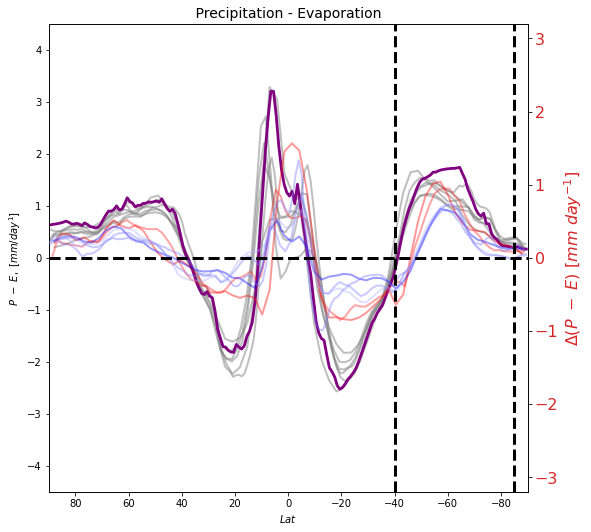

In [10]:
P_E_analysis()

# Fig_S2:

Plotting:

In [41]:
# read P - E data:
file_P_E_44GCMs = glob.glob(pth_data+'_P_E_data(global).npz')

file_P_E_6GCMs = glob.glob(pth_data+'6GCMs_P_E_data(global).npz')


D_P_E_44 = np.load(file_P_E_44GCMs[0], allow_pickle = True)
D_P_E_6 = np.load(file_P_E_6GCMs[0], allow_pickle = True)

data_gcm_pi_44 = D_P_E_44['GCM_p_e_pi'][()]
data_gcm_pi_6 = D_P_E_6['GCM_p_e_pi'][()]
data_gcm_DELTA_44 = D_P_E_44['GCM_p_e_abrminuspi'][()]
data_gcm_DELTA_6 = D_P_E_6['GCM_p_e_abrminuspi'][()]
data_OBS = D_P_E_6['OBS_p_e'][()]

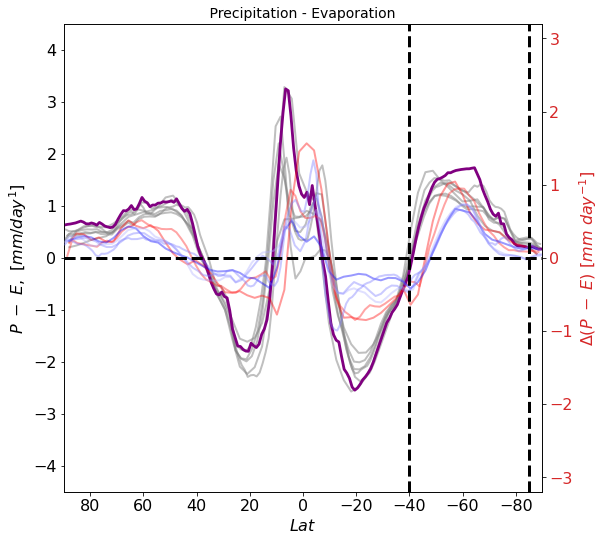

In [42]:
deck1 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M]  #..current # 30 + 14 (44)

deck2 = [MIROCESM, MPIESMLR, bcccsm11, MRICGCM3, GFDLESM2M, GFDLESM2G]  # the remaining 6 moddels
PL_P_E_lat(data_gcm_pi_6, data_gcm_DELTA_6, data_OBS, deck2, pth_plotting)

In [55]:
print(deck2[1]['modn'])

print(data_gcm_pi_6[deck2[1]['modn']])

MPI-ESM-LR
{'P': array([[[1.45836384e-06, 1.46411185e-06, 1.44480146e-06, ...,
         1.78570917e-06, 1.76283356e-06, 1.53669680e-06],
        [4.26468614e-06, 3.58355464e-06, 3.54440999e-06, ...,
         4.47209459e-06, 5.96413156e-06, 6.14115561e-06],
        [8.09066114e-06, 9.50857066e-06, 8.66672781e-06, ...,
         7.52521737e-06, 8.80711013e-06, 4.98718873e-06],
        ...,
        [2.73885962e-06, 4.12978989e-06, 5.29801764e-06, ...,
         3.80130950e-06, 3.39248800e-06, 3.02070112e-06],
        [2.46716081e-06, 3.29698378e-06, 3.69154441e-06, ...,
         3.40376573e-06, 2.81528628e-06, 2.47250136e-06],
        [6.32720185e-06, 6.50434231e-06, 6.66268170e-06, ...,
         4.69011138e-06, 5.21882612e-06, 5.36029984e-06]],

       [[1.46187085e-06, 1.45354716e-06, 1.44938531e-06, ...,
         1.48883555e-06, 1.48151594e-06, 1.46997627e-06],
        [4.21101868e-06, 4.65090852e-06, 4.87302896e-06, ...,
         4.35877882e-06, 3.18011735e-06, 3.51018389e-06],
        

In [56]:
print(deck1[1]['modn'])

print(data_gcm_pi_44[deck1[1]['modn']])

CanESM5
{'P': array([[[1.2771726e-06, 1.2608541e-06, 1.2420425e-06, ...,
         1.2846281e-06, 1.2835953e-06, 1.2883617e-06],
        [3.6702841e-06, 3.7021355e-06, 3.6194797e-06, ...,
         3.1538498e-06, 3.3897647e-06, 3.5407963e-06],
        [3.9784627e-06, 3.7624879e-06, 3.0086685e-06, ...,
         2.4182443e-06, 2.8166917e-06, 3.2859350e-06],
        ...,
        [1.0992236e-06, 7.7179999e-07, 1.0429153e-06, ...,
         4.5310011e-07, 5.4751308e-07, 9.0185898e-07],
        [1.5199720e-06, 1.3621587e-06, 1.4427475e-06, ...,
         1.9504503e-06, 1.4761537e-06, 1.3711563e-06],
        [2.0325733e-06, 1.8650163e-06, 1.6807608e-06, ...,
         2.0306504e-06, 1.9774955e-06, 2.0324128e-06]],

       [[2.7556091e-06, 2.9705670e-06, 3.1669383e-06, ...,
         2.1481367e-06, 2.3314553e-06, 2.5475049e-06],
        [3.3520523e-06, 3.4395894e-06, 3.7335351e-06, ...,
         2.1761446e-06, 2.6326315e-06, 2.8338538e-06],
        [2.6764399e-06, 2.8153340e-06, 2.7875192e-06, ...,


In [43]:
# Concatenate 44 + 6 GCMs data:

data_gcm_pi_50 = {}

for i in range(len(deck1)):
    
    data_gcm_pi_50[deck1[i]['modn']+'MC'] = data_gcm_pi_44[deck1[i]['modn']]['MC']

for j in range(len(deck2)):
    
    data_gcm_pi_50[deck2[j]['modn']+'MC'] = data_gcm_pi_6[deck2[j]['modn']]['MC']

# print(data_gcm_pi_50)

In [44]:
data_gcm_DELTA_50 = {}

for i in range(len(deck1)):
    
    data_gcm_DELTA_50[deck1[i]['modn']+'MC'] = data_gcm_DELTA_44[deck1[i]['modn']+ 'MC']
    
    data_gcm_DELTA_50[deck1[i]['modn']+'lat'] = data_gcm_DELTA_44[deck1[i]['modn']+ 'lat']
    data_gcm_DELTA_50[deck1[i]['modn']+'lon'] = data_gcm_DELTA_44[deck1[i]['modn'] +'lon']
    
for j in range(len(deck2)):
    
    data_gcm_DELTA_50[deck2[j]['modn']+'MC'] = data_gcm_DELTA_6[deck2[j]['modn'] +'MC']
    data_gcm_DELTA_50[deck2[j]['modn']+'lat'] = data_gcm_DELTA_6[deck2[j]['modn']+ 'lat']
    data_gcm_DELTA_50[deck2[j]['modn']+'lon'] = data_gcm_DELTA_6[deck2[j]['modn'] +'lon']

# print(data_gcm_DELTA_50)

In [46]:
data_OBS_50 = {}

data_OBS_50['MC'] = deepcopy(data_OBS['MC'])
data_OBS_50['lat'] = deepcopy(data_OBS['lat'])
data_OBS_50['lon'] = deepcopy(data_OBS['lon'])

print(data_OBS_50)

{'MC': array([[[0.34299898, 0.34391975, 0.34483984, ..., 0.34025437,
         0.3411706 , 0.34208566],
        [0.23164216, 0.23843464, 0.24650319, ..., 0.22567953,
         0.22748516, 0.22933379],
        [0.24478574, 0.2536695 , 0.26257113, ..., 0.21824034,
         0.22708404, 0.2359343 ],
        ...,
        [0.66621965, 0.661609  , 0.6571696 , ..., 0.68075955,
         0.6758523 , 0.6709831 ],
        [0.36829746, 0.36766332, 0.36707076, ..., 0.3718613 ,
         0.37068743, 0.36948362],
        [0.3147347 , 0.3146152 , 0.31450218, ..., 0.31507963,
         0.31496817, 0.3148502 ]],

       [[0.28891808, 0.2897956 , 0.29068118, ..., 0.28634456,
         0.28719392, 0.28805193],
        [0.1636584 , 0.1681315 , 0.17341699, ..., 0.15907471,
         0.1604941 , 0.16193578],
        [0.16704598, 0.1688715 , 0.17072296, ..., 0.16168149,
         0.16347024, 0.1652539 ],
        ...,
        [0.47363007, 0.47848326, 0.48336625, ..., 0.4592902 ,
         0.46403715, 0.46881148],
     

In [47]:
np.savez(pth_data+'50GCMs_P_E_data', GCM_p_e_pi = data_gcm_pi_50, GCM_p_e_abrminuspi = data_gcm_DELTA_50, OBS_p_e = data_OBS_50)

### Plotting again for FULL 50 GCMs:

In [57]:
# read data: 

file_P_E_50GCMs = glob.glob(pth_data+'50GCMs_P_E_data.npz')

D_P_E_50 = np.load(file_P_E_50GCMs[0], allow_pickle = True)

data_gcm_pi = D_P_E_50['GCM_p_e_pi'][()]

data_gcm_DELTA = D_P_E_50['GCM_p_e_abrminuspi'][()]

data_OBS = D_P_E_50['OBS_p_e'][()]

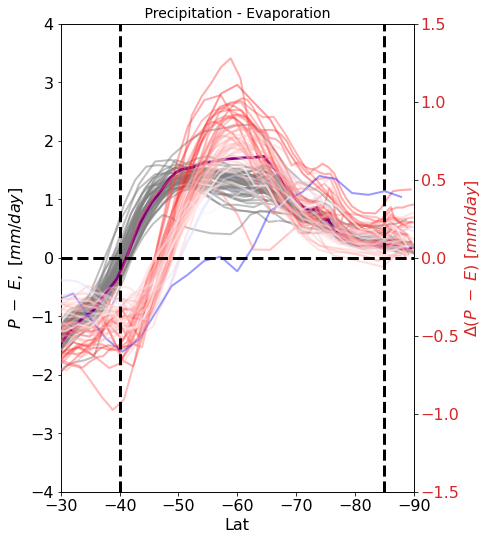

In [65]:
# This function is for plotting (1)the 'P - E' vs latitude plot, (2)the 'delta_P-E' vs latitude plot.
# 'data_gcm_pi' is a dict who save the 'piControl' Moisture Convergence data,
# 'data_gcm_DELTA' save the DELTA_Moisture Convergence | (abrupt4xCO2 - mean(piControl)) data,
# 'data_obs' save the MERRA-2 Moisture Convergence data;
# deck is a list for GCM info,
# pth_plotting provides the plots saving path.

figS1 = plt.figure(figsize=( 9.5, 6.5)) # (16.2, 9.3))
axS1 = figS1.add_axes([0,0,0.7,1])
parameters = {'axes.labelsize': 16, 'legend.fontsize': 17, 'axes.titlesize': 14, 'xtick.labelsize': 16, 'ytick.labelsize': 16}

plt.rcParams.update(parameters)

# plotting:
for i in range(len(deck)):
    # 'piControl' P - E:
    axS1.plot(data_gcm_DELTA[deck[i]['modn']+ 'lat'], np.nanmean(data_gcm_pi[deck[i]['modn'] +'MC'], axis = (0,2)), color = 'gray', alpha = 0.50, linewidth = 2., label = "mean state P - E ", zorder =10)

axS2 = axS1.twinx()
color = 'tab:red'

# Create a color palette
palette = plt.get_cmap('bwr')
axS2.set_ylabel(r"$ \Delta (P\ -\ E)\ [mm/day] $", color=color)  # we already handled the x-label with ax1
axS2.tick_params(axis='y', labelcolor=color)

# calc the SO mean delta_Moiusture Convergence, use this value for palette:

relative_P_E = []

for j in range(len(deck)):
    data_gcm_DELTA_SO, lat_gcm_so, lon_gcm_so = region_cropping_var(data_gcm_DELTA[deck[j]['modn']+'MC'], data_gcm_DELTA[deck[j]['modn']+'lat'], data_gcm_DELTA[deck[j]['modn']+'lon'], lat_range = [-85., -40.], lon_range = [-180., 180.])

    relative_P_E.append(np.nanmean(area_mean(data_gcm_DELTA_SO[12*140:12*150, :,:], lat_gcm_so, lon_gcm_so)))

# Normalized array between 0, 1: (# = 50)
nor_SO_P_E = (np.asarray(relative_P_E) - np.min(relative_P_E)) / (np.max(relative_P_E) - np.min(relative_P_E))

for j in range(len(deck)):
    axS2.plot(data_gcm_DELTA[deck[j]['modn']+'lat'], np.nanmean(data_gcm_DELTA[deck[j]['modn']+'MC'][12*140:12*150, :, :], axis = (0, 2)), color = palette(nor_SO_P_E[j]), linewidth = 2.0, alpha = 0.40, linestyle = '-', label = r"$\ Delta P\ -\ E $", zorder = 50)

axS1.plot(data_OBS['lat'], np.nanmean(data_OBS['MC'], axis = (0, 2)), color = 'purple', linewidth = 2.8, alpha = 1.0, linestyle = '-', label = ' MERRA-2 Observation ', zorder = 60)


plt.axhline(0., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
plt.axvline(-85., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
plt.axvline(-40., color = 'k', linewidth = 3., linestyle = '--', zorder = 100)
# plotting setting:
axS1.set_xlim([-30., -90.])

axS1.set_ylim([-4.0, 4.0])   # [-4.5, 4.5]
axS2.set_ylim([-1.5, 1.5])   # [-3.2, 3.2]
axS1.set_ylabel(r"$ P\ -\ E,\ [mm/day] $")
axS1.set_xlabel("Lat")
plt.title(" Precipitation - Evaporation ")

# plt.show()

# plt.savefig(pth_plotting+"Fig_S1(b).jpg", bbox_inches = 'tight', dpi = 500)